In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import sys
import os
sys.path.append('../')
sys.path.append(os.path.abspath(os.path.join("../scr")))
    

In [3]:
df_orig=pd.read_csv('../dataset/DNN-EdgeIIoT-dataset.csv')
df1=df_orig.copy()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2,3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219201 entries, 0 to 2219200
Data columns (total 63 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   frame.time                 object 
 1   ip.src_host                object 
 2   ip.dst_host                object 
 3   arp.dst.proto_ipv4         object 
 4   arp.opcode                 float64
 5   arp.hw.size                float64
 6   arp.src.proto_ipv4         object 
 7   icmp.checksum              float64
 8   icmp.seq_le                float64
 9   icmp.transmit_timestamp    float64
 10  icmp.unused                float64
 11  http.file_data             object 
 12  http.content_length        float64
 13  http.request.uri.query     object 
 14  http.request.method        object 
 15  http.referer               object 
 16  http.request.full_uri      object 
 17  http.request.version       object 
 18  http.response              float64
 19  http.tls_port              float64
 20  tc

In [4]:
df1.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal


In [4]:
# drop some unwanted feature that might cause overfitting
df1.drop(['frame.time', 'ip.src_host', 'ip.dst_host'],axis=1,inplace=True)


In [5]:
# drop some unwanted feature that might cause overfitting
df1.drop(['tcp.payload','tcp.srcport','tcp.dstport','udp.port'],axis=1,inplace=True)

In [6]:
# further features to remove
df1.drop(['arp.dst.proto_ipv4','arp.src.proto_ipv4'],axis=1,inplace=True)

In [7]:
# further features to non_numerical remove
df1.drop(['http.file_data', 'http.request.uri.query', 'http.request.method','http.referer', 'http.request.full_uri', 
'tcp.options', 'mqtt.conack.flags', 'mqtt.msg', 'mqtt.protoname'], axis=1,inplace=True)

In [55]:
df1

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.request.version,http.response,http.tls_port,...,mqtt.msgtype,mqtt.proto_len,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,1.0,4.0,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,3.0,0.0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219196,0.0,0.0,31814.0,45620.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219197,0.0,0.0,27718.0,45636.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219198,0.0,0.0,18502.0,45672.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219199,0.0,0.0,1862.0,45737.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [9]:
df1['Attack_type'].value_counts()

Normal                   1615643
DDoS_UDP                  121568
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
MITM                        1214
Fingerprinting              1001
Name: Attack_type, dtype: int64

In [8]:
df = df1.copy()
df

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.request.version,http.response,http.tls_port,...,mqtt.msgtype,mqtt.proto_len,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,1.0,4.0,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,3.0,0.0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219196,0.0,0.0,31814.0,45620.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219197,0.0,0.0,27718.0,45636.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219198,0.0,0.0,18502.0,45672.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219199,0.0,0.0,1862.0,45737.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [57]:
df.isna().sum()

arp.opcode                   0
arp.hw.size                  0
icmp.checksum                0
icmp.seq_le                  0
icmp.transmit_timestamp      0
icmp.unused                  0
http.content_length          0
http.request.version         0
http.response                0
http.tls_port                0
tcp.ack                      0
tcp.ack_raw                  0
tcp.checksum                 0
tcp.connection.fin           0
tcp.connection.rst           0
tcp.connection.syn           0
tcp.connection.synack        0
tcp.flags                    0
tcp.flags.ack                0
tcp.len                      0
tcp.seq                      0
udp.stream                   0
udp.time_delta               0
dns.qry.name                 0
dns.qry.name.len             0
dns.qry.qu                   0
dns.qry.type                 0
dns.retransmission           0
dns.retransmit_request       0
dns.retransmit_request_in    0
mqtt.conflag.cleansess       0
mqtt.conflags                0
mqtt.hdr

In [12]:
# df

In [58]:
# Investigating the types of features and targets
df.columns

Index(['arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le',
       'icmp.transmit_timestamp', 'icmp.unused', 'http.content_length',
       'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu',
       'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conflag.cleansess', 'mqtt.conflags',
       'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msgtype',
       'mqtt.proto_len', 'mqtt.topic', 'mqtt.topic_len', 'mqtt.ver',
       'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_label',
       'Attack_type'],
      dtype='object')

In [14]:
df

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.file_data,http.content_length,http.request.uri.query,http.request.method,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219196,0.0,0.0,31814.0,45620.0,0.0,0.0,0,0.0,0,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219197,0.0,0.0,27718.0,45636.0,0.0,0.0,0,0.0,0,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219198,0.0,0.0,18502.0,45672.0,0.0,0.0,0,0.0,0,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219199,0.0,0.0,1862.0,45737.0,0.0,0.0,0,0.0,0,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [59]:
non_num_norm= df.select_dtypes(include=['object','bool'])
cat_columns= non_num_norm.columns
cat_columns

Index(['http.request.version', 'dns.qry.name.len', 'mqtt.topic',
       'Attack_type'],
      dtype='object')

In [60]:
df[cat_columns] = df[cat_columns].astype('str')


In [61]:
columns= ['http.request.version', 'dns.qry.name.len', 'mqtt.topic']

SEPARATING NOMAL AND ANOURMOUS DATASET

In [10]:

df_types= df.groupby(df.Attack_label)
# get the number of normal records
df_normal =df_types.get_group(0).reset_index(drop=True)
# df_normal['mqtt.topic'].value_counts()
df_normal


,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.request.version,http.response,http.tls_port,...,mqtt.msgtype,mqtt.proto_len,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,1.0,4.0,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,3.0,0.0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1615639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1615640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1615641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,Normal


In [63]:
df_normal['Attack_type'].unique()

array(['Normal'], dtype=object)

 Get records of attacts

In [18]:
# Get records of attacts
df_group =df.groupby(df.Attack_type)
df_group


In [19]:
df_abnormal =df_types.get_group(1).reset_index(drop=True)
df_abnormal['Attack_type'].unique()

array(['MITM', 'Uploading', 'Ransomware', 'SQL_injection', 'DDoS_HTTP',
       'DDoS_TCP', 'Password', 'Port_Scanning', 'Vulnerability_scanner',
       'Backdoor', 'XSS', 'Fingerprinting', 'DDoS_UDP', 'DDoS_ICMP'],
      dtype=object)

In [65]:
df_abnormal.columns

Index(['arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le',
       'icmp.transmit_timestamp', 'icmp.unused', 'http.content_length',
       'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu',
       'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conflag.cleansess', 'mqtt.conflags',
       'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msgtype',
       'mqtt.proto_len', 'mqtt.topic', 'mqtt.topic_len', 'mqtt.ver',
       'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_label',
       'Attack_type'],
      dtype='object')

In [66]:
df_abnormal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603558 entries, 0 to 603557
Data columns (total 45 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   arp.opcode                 603558 non-null  float64
 1   arp.hw.size                603558 non-null  float64
 2   icmp.checksum              603558 non-null  float64
 3   icmp.seq_le                603558 non-null  float64
 4   icmp.transmit_timestamp    603558 non-null  float64
 5   icmp.unused                603558 non-null  float64
 6   http.content_length        603558 non-null  float64
 7   http.request.version       603558 non-null  object 
 8   http.response              603558 non-null  float64
 9   http.tls_port              603558 non-null  float64
 10  tcp.ack                    603558 non-null  float64
 11  tcp.ack_raw                603558 non-null  float64
 12  tcp.checksum               603558 non-null  float64
 13  tcp.connection.fin         60

<!-- I. NORMAL RECORCORDS DATASET  PREPROCESSING -->

I. NORMAL RECORCORDS DATASET PREPROCESSING 

In [68]:
df_normal['dns.qry.name.len'].value_counts()


0                         1613798
0.debian.pool.ntp.org         454
3.debian.pool.ntp.org         450
2.debian.pool.ntp.org         446
1.debian.pool.ntp.org         445
raspberrypi.local              38
null-null.local                 6
_googlecast._tcp.local          6
Name: dns.qry.name.len, dtype: int64

In [24]:
# non_num_norm= df_normal.select_dtypes(include=[object])
# non_num_norm.columns

In [25]:
# split the dataset in features
df_feautes= df_normal.iloc[:,:-2]
df_feautes

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.file_data,http.content_length,http.request.uri.query,http.request.method,...,mqtt.msg,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32342e36382037362e34320d0a,3.0,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
1615639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
1615640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
1615641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [26]:
# split the dataset in targets
df_target=df_normal.iloc[:,-2:-1]
df_target

,Attack_label
0,0
1,0
2,0
3,0
4,0
...,...
1615638,0
1615639,0
1615640,0
1615641,0


In [27]:
# split the dataset in features, targets for training and testing
x_train,x_test, y_train, y_test = train_test_split(df_feautes,df_target, test_size=0.2, random_state= 42)

In [28]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292514 entries, 958625 to 121958
Data columns (total 52 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   arp.opcode                 1292514 non-null  float64
 1   arp.hw.size                1292514 non-null  float64
 2   icmp.checksum              1292514 non-null  float64
 3   icmp.seq_le                1292514 non-null  float64
 4   icmp.transmit_timestamp    1292514 non-null  float64
 5   icmp.unused                1292514 non-null  float64
 6   http.file_data             1292514 non-null  object 
 7   http.content_length        1292514 non-null  float64
 8   http.request.uri.query     1292514 non-null  object 
 9   http.request.method        1292514 non-null  object 
 10  http.referer               1292514 non-null  object 
 11  http.request.full_uri      1292514 non-null  object 
 12  http.request.version       1292514 non-null  object 
 13  http.res

In [29]:
x_train.shape

(1292514, 52)

In [30]:
x_test.shape

(323129, 52)

In [31]:
y_train.shape

(1292514, 1)

In [32]:
y_test.shape

(323129, 1)

In [69]:
# 
X_train_non_num_norm= x_train.select_dtypes(include=[object])

X_train_non_num_norm.describe()

,http.file_data,http.request.uri.query,http.request.method,http.referer,http.request.full_uri,http.request.version,tcp.options,dns.qry.name.len,mqtt.conack.flags,mqtt.msg,mqtt.protoname,mqtt.topic
count,1292514,1292514,1292514,1292514,1292514,1292514,1292514,1292514,1292514,1292514,1292514,1292514
unique,1,1,1,1,1,1,3225,8,12,135,2,2
top,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
freq,1292514,1292514,1292514,1292514,1292514,1292514,1152249,1291057,1226067,1226175,1226108,1226175


In [34]:
X_test_non_num_norm= x_test.select_dtypes(include=[object])

X_test_non_num_norm.describe()

,http.file_data,http.request.uri.query,http.request.method,http.referer,http.request.full_uri,http.request.version,tcp.options,dns.qry.name.len,mqtt.conack.flags,mqtt.msg,mqtt.protoname,mqtt.topic
count,323129,323129,323129,323129,323129,323129,323129,323129,323129,323129,323129,323129
unique,1,1,1,1,1,1,868,7,5,130,2,2
top,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
freq,323129,323129,323129,323129,323129,323129,287972,322741,306519,306452,306500,306452


In [35]:
# # encoding categorical features
# unique_values = pd.unique(X_train_non_num_norm.values.ravel()) 

# ohe = OneHotEncoder(categories=[unique_values]*X_train_non_num_norm.shape[1], sparse=False)


In [36]:
# encoded = pd.DataFrame(ohe.fit_transform(X_train_non_num_norm), columns=ohe.get_feature_names(X_train_non_num_norm.columns))

In [37]:
# encoded.shape

In [38]:

# #One-hot-encode the categorical columns.
# #Unfortunately outputs an array instead of dataframe.
# # hot_encoded_norm_array= ohe.fit_transform(df_normal[columns])
# #Extract only the columns that didnt need to be encoded
# data_other_cols = df_normal.drop(columns=columns)
# data_other_cols
# #Concatenate the two dataframes : 
# df_normal_enc = pd.concat([data_hot_encoded, data_other_cols], axis=1)
# # df_normal_enc

In [39]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(x_train)

OneHotEncoder(handle_unknown='ignore')

In [40]:
# enc.transform(x_train).toarray()

In [71]:
df_normal.shape

(1615643, 45)

In [43]:
# df_normal[['Attack_label','Attack_type']]

In [72]:
non_num_norm= df_normal.select_dtypes(include=[object])
non_num_norm.describe()

,http.request.version,dns.qry.name.len,mqtt.topic,Attack_type
count,1615643,1615643,1615643,1615643
unique,1,8,2,1
top,0.0,0,0,Normal
freq,1615643,1613798,1532627,1615643


In [76]:
df_normal['mqtt.topic'].value_counts()

0                           1532627
Temperature_and_Humidity      83016
Name: mqtt.topic, dtype: int64

In [77]:
pd.get_dummies(df_normal, columns=['http.request.version', 'dns.qry.name.len', 'mqtt.topic'])

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,...,dns.qry.name.len_0,dns.qry.name.len_0.debian.pool.ntp.org,dns.qry.name.len_1.debian.pool.ntp.org,dns.qry.name.len_2.debian.pool.ntp.org,dns.qry.name.len_3.debian.pool.ntp.org,dns.qry.name.len__googlecast._tcp.local,dns.qry.name.len_null-null.local,dns.qry.name.len_raspberrypi.local,mqtt.topic_0,mqtt.topic_Temperature_and_Humidity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,1,0,0,0,0,0,0,0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,1,0,0,0,0,0,0,0,1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1615639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1615640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
1615641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0


In [75]:
df_normal['dns.qry.name.len'].value_counts()

0                         1613798
0.debian.pool.ntp.org         454
3.debian.pool.ntp.org         450
2.debian.pool.ntp.org         446
1.debian.pool.ntp.org         445
raspberrypi.local              38
null-null.local                 6
_googlecast._tcp.local          6
Name: dns.qry.name.len, dtype: int64

In [46]:
non_num_norm

,http.file_data,http.request.uri.query,http.request.method,http.referer,http.request.full_uri,http.request.version,dns.qry.name.len,mqtt.conack.flags,mqtt.msg,mqtt.protoname,mqtt.topic,Attack_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,Normal
1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,MQTT,0,Normal
2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,Normal
3,0.0,0.0,0.0,0.0,0.0,0.0,0,0x00000000,0,0,0,Normal
4,0.0,0.0,0.0,0.0,0.0,0.0,0,0,32342e36382037362e34320d0a,0,Temperature_and_Humidity,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
1615638,0.0,0.0,0.0,0.0,0.0,0.0,2.debian.pool.ntp.org,0,0,0,0,Normal
1615639,0.0,0.0,0.0,0.0,0.0,0.0,2.debian.pool.ntp.org,0,0,0,0,Normal
1615640,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,Normal
1615641,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,Normal


In [79]:
categorical_cols = ['http.request.version', 'dns.qry.name.len', 'mqtt.topic']

In [80]:
onehotencoder = OneHotEncoder(sparse=False, categories='auto', handle_unknown='ignore')

transformed_data = onehotencoder.fit_transform(df_normal[categorical_cols])



In [82]:
# the above transformed_data is an array that needs to be converted into dataframe
encoded_data = pd.DataFrame(transformed_data, index=df_normal.index)



In [83]:
encoded_data.shape

(1615643, 11)

In [84]:
#Extract only the columns that didnt need to be encoded
data_other_cols = df_normal.drop(columns=categorical_cols)

In [85]:
# now concatenate the original data and the encoded data using pandas
concatenated_data = pd.concat([data_other_cols, encoded_data], axis=1)


In [86]:
df_normal_target=concatenated_data.drop(['Attack_label','Attack_type'], axis=1)

In [87]:
df_normal_target[['Attack_label','Attack_type']]= df_normal[['Attack_label','Attack_type']]

In [88]:
df_normal_target.head()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,...,3,4,5,6,7,8,9,10,Attack_label,Attack_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,Normal
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,Normal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,Normal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,Normal
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,Normal


In [89]:
onehotencoder.categories_

[array(['0.0'], dtype=object),
 array(['0', '0.debian.pool.ntp.org', '1.debian.pool.ntp.org',
        '2.debian.pool.ntp.org', '3.debian.pool.ntp.org',
        '_googlecast._tcp.local', 'null-null.local', 'raspberrypi.local'],
       dtype=object),
 array(['0', 'Temperature_and_Humidity'], dtype=object)]

SAVE THE DATASET

In [90]:
df_normal_target.to_csv('../dataset/DNN-EdgeIIoT_df_normal_with_target_encoded.csv')

In [91]:
df_normal_target.shape

(1615643, 53)

In [ ]:
# onehotencoder.inverse_transform(encoded_data)

In [92]:
df_normal_target.head()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,...,3,4,5,6,7,8,9,10,Attack_label,Attack_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,Normal
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,Normal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,Normal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,Normal
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,Normal


In [ ]:
# df_normal_enc.drop(0,axis= 1,inplace=True)
# df_normal_dum = pd.get_dummies(df_normal_1, columns = categorical_cols)


In [93]:
df_normal_target[df_normal_target.isnull().any(axis=1)]

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,...,3,4,5,6,7,8,9,10,Attack_label,Attack_type


II. ANORMOUS RECORCORDS DATASET PREPROCESSING 

In [94]:
df_abnormal.head()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.request.version,http.response,http.tls_port,...,mqtt.msgtype,mqtt.proto_len,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


In [95]:
# df_abnormal.drop(['tcp.options'],axis=1, inplace=True)
df_abnormal.head()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.request.version,http.response,http.tls_port,...,mqtt.msgtype,mqtt.proto_len,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


In [98]:
df_abnormal_non_num=df_abnormal.select_dtypes(include='object')
columns_non_num_abn=df_abnormal_non_num.columns
columns_non_num_abn= ['http.request.version', 'dns.qry.name.len', 'mqtt.topic']
# len(columns_non_num_abn)

In [99]:

df_abnormal_1_enc = onehotencoder.fit_transform(df_abnormal[columns_non_num_abn])

In [100]:
#Convert it to df
df_abonal_hot_encoded= pd.DataFrame(df_abnormal_1_enc,index=df_abnormal.index )


In [101]:
df_abonal_hot_encoded.shape

(603558, 16)

In [103]:
#Extract only the columns that didnt need to be encoded
df_other_cols = df_abnormal.drop(columns=columns_non_num_abn)

In [104]:
df_other_cols

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,...,mqtt.msg_decoded_as,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603553,0.0,0.0,31814.0,45620.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
603554,0.0,0.0,27718.0,45636.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
603555,0.0,0.0,18502.0,45672.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
603556,0.0,0.0,1862.0,45737.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [109]:
#Concatenate the two dataframes : 
df_abnormal_final = pd.concat([df_other_cols,df_abonal_hot_encoded], axis=1)


In [110]:
df_abnormal_target=df_abnormal_final.drop(['Attack_label','Attack_type'], axis=1)

In [111]:
df_abnormal_target[['Attack_label','Attack_type']]= df_abnormal[['Attack_label','Attack_type']]

In [112]:
df_abnormal_target

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,...,8,9,10,11,12,13,14,15,Attack_label,Attack_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,MITM
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,MITM
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,MITM
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,MITM
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,MITM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603553,0.0,0.0,31814.0,45620.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,DDoS_ICMP
603554,0.0,0.0,27718.0,45636.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,DDoS_ICMP
603555,0.0,0.0,18502.0,45672.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,DDoS_ICMP
603556,0.0,0.0,1862.0,45737.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,DDoS_ICMP


In [113]:
df_abnormal_target.to_csv('DNN-EdgeIIoT_df_anormous_with_target_encoded.csv')

In [ ]:
df_abnormal_target.isna().sum()

arp.opcode                   1012085
arp.hw.size                  1012085
icmp.checksum                1012085
icmp.seq_le                  1012085
icmp.transmit_timestamp      1012085
icmp.unused                  1012085
http.content_length          1012085
http.response                1012085
http.tls_port                1012085
tcp.ack                      1012085
tcp.ack_raw                  1012085
tcp.checksum                 1012085
tcp.connection.fin           1012085
tcp.connection.rst           1012085
tcp.connection.syn           1012085
tcp.connection.synack        1012085
tcp.dstport                  1012085
tcp.flags                    1012085
tcp.flags.ack                1012085
tcp.len                      1012085
tcp.seq                      1012085
tcp.srcport                  1012452
udp.port                     1012085
udp.stream                   1012085
udp.time_delta               1012085
dns.qry.name                 1012085
dns.qry.qu                   1012085
d

In [ ]:
# get the train and test set.
x_train,x_test, y_train, y_test = train_test_split(X,y, train_size=0.2, random_state= 42)

In [ ]:
x_train.shape

(149381, 46)

II. DATASET


In [ ]:
df_oit= pd.read_csv('/Users/apple/Desktop/flower/Heart_Rate.csv')
len(df_oit['ip.dst_host'].unique())


6

In [ ]:
df_oit

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 02:39:39.986982000,192.168.3.18,192.168.3.12,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 02:39:39.987068000,192.168.3.12,192.168.3.18,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
2,2021 02:39:40.000498000,192.168.3.18,192.168.3.12,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
3,2021 02:39:40.000575000,192.168.3.12,192.168.3.18,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 02:39:40.001196000,192.168.3.12,192.168.3.18,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165314,2021 03:10:17.376892000,192.168.3.12,192.168.3.18,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
165315,2021 03:10:17.376907000,192.168.3.18,192.168.3.12,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
165316,2021 03:10:17.376921000,192.168.3.12,192.168.3.18,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
165317,2021 03:10:17.376933000,192.168.3.18,192.168.3.12,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal


In [ ]:
data = pd.read_csv('../dataset/Train_Test_Network.csv')
df_1 = data.copy()
df_1.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,...,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal


In [ ]:
df_1.columns

Index(['ts', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'service',
       'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes',
       'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA',
       'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',
       'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth',
       'http_method', 'http_uri', 'http_version', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
       'weird_addl', 'weird_notice', 'label', 'type'],
      dtype='object')

In [ ]:
columns=['ts', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'service',
       'duration', 'src_bytes', 'dst_bytes', 'conn_state',
       'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA',
       'dns_rejected',  'ssl_resumed', 'http_trans_depth','http_user_agent', 'weird_name', 'type']

In [ ]:
len(columns)

28

In [ ]:
df_1[['label', 'type']]

,label,type
0,0,normal
1,0,normal
2,0,normal
3,0,normal
4,0,normal
...,...,...
461038,1,xss
461039,1,ransomware
461040,1,backdoor
461041,1,mitm


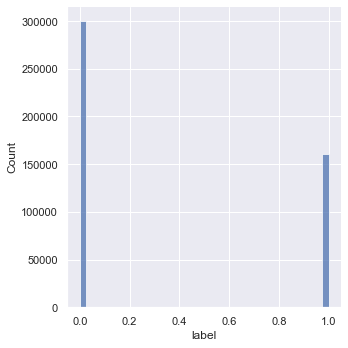

In [ ]:

sns.displot(data=data, x="label")

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ts                      461043 non-null  int64  
 1   src_ip                  461043 non-null  object 
 2   src_port                461043 non-null  int64  
 3   dst_ip                  461043 non-null  object 
 4   dst_port                461043 non-null  int64  
 5   proto                   461043 non-null  object 
 6   service                 461043 non-null  object 
 7   duration                461043 non-null  float64
 8   src_bytes               461043 non-null  int64  
 9   dst_bytes               461043 non-null  int64  
 10  conn_state              461043 non-null  object 
 11  missed_bytes            461043 non-null  int64  
 12  src_pkts                461043 non-null  int64  
 13  src_ip_bytes            461043 non-null  int64  
 14  dst_pkts            

In [ ]:
# drop the label
new_df = df_1.drop(['label'], axis=1)


In [ ]:
new_df= new_df[columns]
new_df

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_resumed,http_trans_depth,http_user_agent,weird_name,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,...,0,-,-,-,-,-,-,-,bad_TCP_checksum,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,...,0,-,-,-,-,-,-,-,-,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,...,0,-,-,-,-,-,-,-,bad_TCP_checksum,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,...,0,-,-,-,-,-,-,-,-,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,...,0,-,-,-,-,-,-,-,bad_UDP_checksum,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461038,1556340862,192.168.1.32,33108,176.28.50.165,80,tcp,-,0.000000,0,0,...,0,-,-,-,-,-,-,-,-,xss
461039,1556423390,192.168.1.33,37242,34.230.157.88,443,tcp,-,0.000000,0,0,...,0,-,-,-,-,-,-,-,-,ransomware
461040,1556436603,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,...,0,-,-,-,-,-,-,-,-,backdoor
461041,1556540442,192.168.1.31,60816,104.98.29.100,443,tcp,-,23.190902,32,31,...,0,-,-,-,-,-,-,-,-,mitm


<AxesSubplot:>

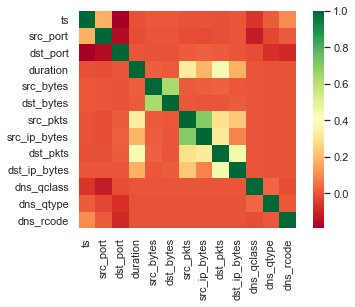

In [ ]:
sns.heatmap(new_df.corr(), square=True, cmap='RdYlGn')

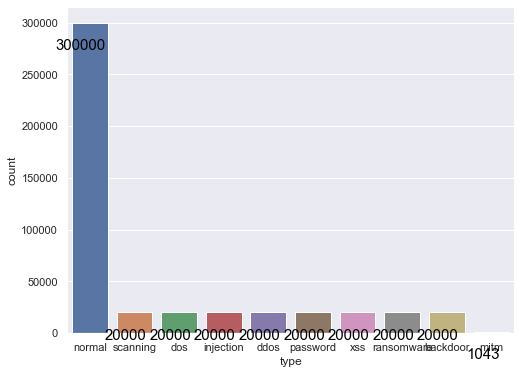

In [ ]:
plt.figure(figsize=(8,6))
# sns.countplot(x = 'type', data=data)
ax=sns.countplot(x=data['type'], data=data);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=15)


In [ ]:
new_df.isnull().sum()

ts                  0
src_ip              0
src_port            0
dst_ip              0
dst_port            0
proto               0
service             0
duration            0
src_bytes           0
dst_bytes           0
conn_state          0
src_pkts            0
src_ip_bytes        0
dst_pkts            0
dst_ip_bytes        0
dns_query           0
dns_qclass          0
dns_qtype           0
dns_rcode           0
dns_AA              0
dns_RD              0
dns_RA              0
dns_rejected        0
ssl_resumed         0
http_trans_depth    0
http_user_agent     0
weird_name          0
type                0
dtype: int64

In [ ]:
# data_copy1 = data_copy.drop(['type'], axis = 1)
# data_copy1.head()


In [ ]:
# select numeric features 
df_numeric= new_df.select_dtypes(include=['int', 'float'])
df_non_numeric= new_df.select_dtypes(include=['object'])

In [ ]:
len(df_non_numeric['src_ip'].unique())



11536

In [ ]:
df_numeric.columns

Index(['ts', 'src_port', 'dst_port', 'duration', 'src_bytes', 'dst_bytes',
       'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_qclass',
       'dns_qtype', 'dns_rcode'],
      dtype='object')

In [ ]:
# checking about variance
df_numeric.var()
np.var(df_numeric[df_numeric.columns])

ts              8.947692e+11
src_port        3.411200e+08
dst_port        1.944243e+08
duration        2.101112e+05
src_bytes       1.339293e+14
dst_bytes       1.487657e+14
src_pkts        2.682639e+05
src_ip_bytes    2.959817e+10
dst_pkts        6.037369e+05
dst_ip_bytes    2.577432e+10
dns_qclass      4.559395e+06
dns_qtype       7.667631e+02
dns_rcode       2.674316e-01
dtype: float64

In [ ]:
# let's get the copy of the whole dataset to do transform the categorical columns at once
df = data.copy()

In [ ]:
df.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,...,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal


In [ ]:
# define the target attributes

df_target = df_non_numeric['type']
df_target.tail()

461038           xss
461039    ransomware
461040      backdoor
461041          mitm
461042          mitm
Name: type, dtype: object

In [ ]:

le = LabelEncoder()
objFeatures = new_df.select_dtypes(include="object").columns
for feat in objFeatures:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))
 

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ts                461043 non-null  int64  
 1   src_ip            461043 non-null  int64  
 2   src_port          461043 non-null  int64  
 3   dst_ip            461043 non-null  int64  
 4   dst_port          461043 non-null  int64  
 5   proto             461043 non-null  int64  
 6   service           461043 non-null  int64  
 7   duration          461043 non-null  float64
 8   src_bytes         461043 non-null  int64  
 9   dst_bytes         461043 non-null  int64  
 10  conn_state        461043 non-null  int64  
 11  src_pkts          461043 non-null  int64  
 12  src_ip_bytes      461043 non-null  int64  
 13  dst_pkts          461043 non-null  int64  
 14  dst_ip_bytes      461043 non-null  int64  
 15  dns_query         461043 non-null  int64  
 16  dns_qclass        46

In [ ]:
new_df.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_resumed,http_trans_depth,http_user_agent,weird_name,type
0,1554198358,8047,1883,1511,52976,1,0,80549.530260,1762852,41933215,...,0,0,0,0,0,0,0,0,5,5
1,1554198358,4614,47260,1522,15600,2,0,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,5
2,1554198359,4590,1880,1511,51782,1,0,0.000000,0,0,...,0,0,0,0,0,0,0,0,5,5
3,1554198359,4590,34296,1511,10502,1,0,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,5
4,1554198362,4590,46608,1516,53,2,3,0.000549,0,298,...,0,0,0,0,0,0,0,0,6,5


In [ ]:
new_df.to_csv('IoT_train_test_preprocessed.csv')

In [ ]:
proc_df=pd.read_csv('IoT_train_test_preprocessed.csv')
proc_df.head()

,Unnamed: 0,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,...,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_resumed,http_trans_depth,http_user_agent,weird_name,type
0,0,1554198358,8047,1883,1511,52976,1,0,80549.530260,1762852,...,0,0,0,0,0,0,0,0,5,5
1,1,1554198358,4614,47260,1522,15600,2,0,0.000000,0,...,0,0,0,0,0,0,0,0,0,5
2,2,1554198359,4590,1880,1511,51782,1,0,0.000000,0,...,0,0,0,0,0,0,0,0,5,5
3,3,1554198359,4590,34296,1511,10502,1,0,0.000000,0,...,0,0,0,0,0,0,0,0,0,5
4,4,1554198362,4590,46608,1516,53,2,3,0.000549,0,...,0,0,0,0,0,0,0,0,6,5


In [ ]:
# categorical feature
objFeatures


Index([], dtype='object')

In [ ]:
df['type']

0         5
1         5
2         5
3         5
4         5
         ..
461038    9
461039    7
461040    0
461041    4
461042    4
Name: type, Length: 461043, dtype: int64

In [ ]:
# le.inverse_transform(df['type'])


In [ ]:


# le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

<AxesSubplot:>

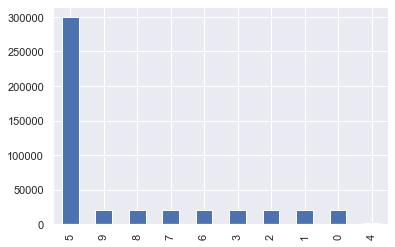

In [ ]:
new_df['type'].value_counts().plot(kind='bar')

GET THE FEATURE AND TARGET DATAFRAMES

In [ ]:
# le.inverse_transform(df['dns_AA'])

# df['src_ip_bytes'].value_counts()

df_feautes= new_df.drop(['type'], axis=1)
df_target= new_df['type']

In [ ]:
df_target. value_counts()

5    300000
9     20000
8     20000
7     20000
6     20000
3     20000
2     20000
1     20000
0     20000
4      1043
Name: type, dtype: int64

In [ ]:
# apply label encoder on the categorical variables
encoded_cat_dfc=df_non_numeric.apply(LabelEncoder().fit_transform)

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(df_feautes,df_target, train_size=0.2, random_state= 42)

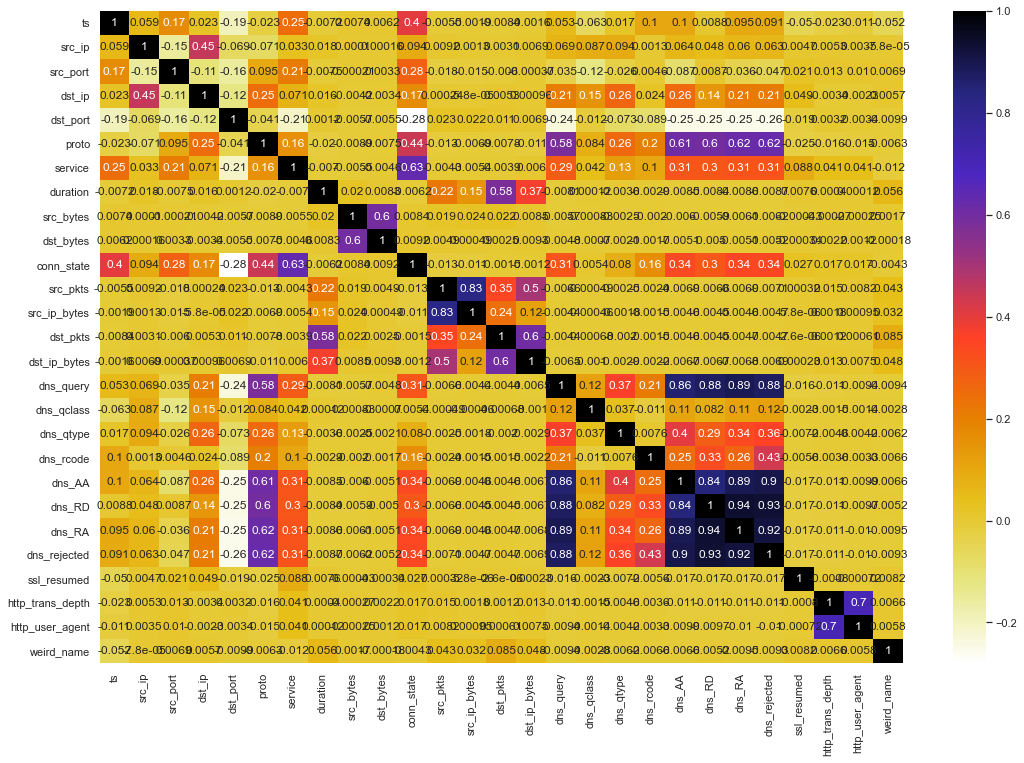

In [ ]:
# using Pearson correlation
plt.figure(figsize=(18,12))
cor= x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()


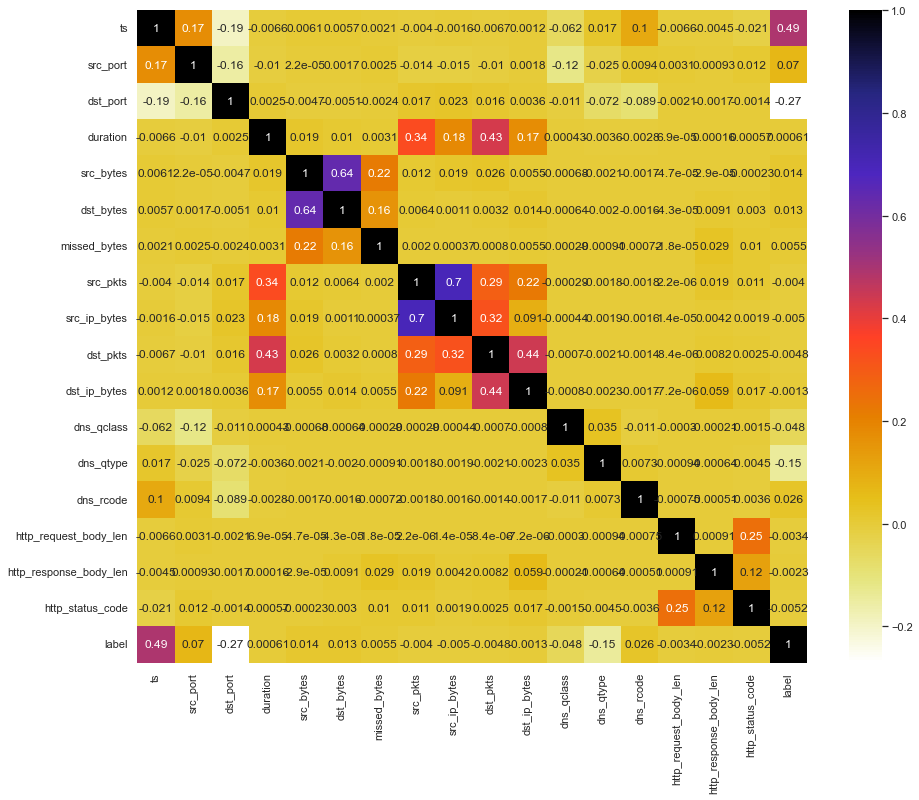

In [ ]:
# using Pearson correlation
plt.figure(figsize=(15,12))
cor= data_copy1_numeric.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
corr_df=data_copy1_numeric.corr()
# correlation with respect to label
corr_df['label'].sort_values(ascending=False)


label                     1.000000
ts                        0.488816
src_port                  0.069546
dns_rcode                 0.025507
src_bytes                 0.013713
dst_bytes                 0.013001
missed_bytes              0.005464
duration                  0.000607
dst_ip_bytes             -0.001338
http_response_body_len   -0.002280
http_request_body_len    -0.003373
src_pkts                 -0.003963
dst_pkts                 -0.004780
src_ip_bytes             -0.005000
http_status_code         -0.005216
dns_qclass               -0.047995
dns_qtype                -0.145034
dst_port                 -0.270791
Name: label, dtype: float64

In [ ]:
# with the following function, we will select highly correlated feautres 
# it will remove the first feature that is correlated with anything other eature
def correlation(dataset, threshold):
    col_corr = set() #  A set of all the names of correlated columns
    corr_matrix= dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [ ]:
corr_features= correlation(data_copy1_numeric,0.8)
len(corr_features) # show that we do have one feature that are correlated to be removed

0

In [ ]:
# when applied on x_train the function returns that 'src_ip_bytes' is causing multcolliniarity
corr_features

set()

In [ ]:
# lets drop highly correlated features
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features, axis=1)

,ts,src_port,dst_port,duration,src_bytes,dst_bytes,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,http_request_body_len,http_response_body_len,http_status_code
169651,1556022080,49500,19315,0.000000,0,0,0,1,44,0,0,0,0,0,0,0,0
384176,1556345053,56368,9197,0.012254,276,6549,0,5,488,9,6921,0,0,0,0,0,0
390784,1556353392,40832,58149,0.000000,0,0,0,1,353,0,0,0,0,0,0,0,0
372155,1556340912,59196,80,0.000000,0,0,0,1,60,0,0,0,0,0,0,0,0
247589,1556249466,51394,53,0.021757,56,733,0,1,84,1,761,1,12,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204707,1556173278,59106,53,0.004641,74,90,0,2,130,2,146,1,1,0,0,0,0
397547,1556358638,33523,1900,0.306332,250,0,0,2,306,0,0,0,0,0,0,0,0
47930,1554253969,54637,5355,0.087935,66,0,0,2,162,0,0,1,255,0,0,0,0
410411,1556423417,49664,1900,0.000000,0,0,0,1,169,0,0,0,0,0,0,0,0


In [ ]:
len(data_copy1_numeric.columns)

18

In [ ]:
data_copy1_numeric.to_csv('IoT_anomaly_B_classification.csv')

FEATURE SELECTION


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

In [ ]:
# x_train,x_test, y_train, y_test

forest = RandomForestRegressor(n_estimators=200, criterion="mse", min_samples_leaf=3, min_samples_split=3, max_depth=10)

forest.fit(x_train, y_train)

# Explained variance score: 1 is perfect prediction
print('Score: %.2f' % forest.score(x_test, y_test, sample_weight=None))
print(forest.score(x_test, y_test))

Score: 1.00
0.9999133212921301


In [ ]:
# GET IMPORTANT FEATURES

forest.feature_importances_


array([6.12390651e-01, 3.20212484e-01, 4.20840868e-02, 2.83696346e-05,
       2.14464947e-04, 8.14755857e-07, 9.33866220e-06, 2.17271225e-05,
       2.10883766e-08, 8.33333254e-08, 2.03595937e-02, 5.97658301e-05,
       6.72604538e-05, 2.19404916e-07, 4.55111977e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

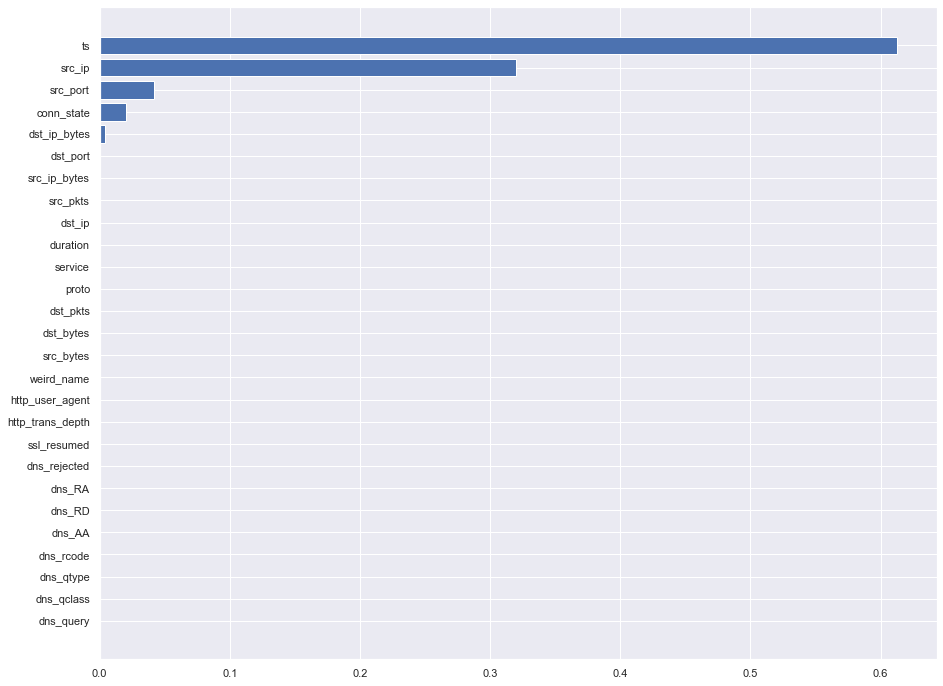

In [ ]:
f_i = list(zip(x_train.columns,forest.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.figure(figsize=(15,12))
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()